# ANN

In [3]:
# installing necessary liberaries
# for data manupulation
import pandas as pd
import numpy as np

# for data visualization
import seaborn as sns
import matplotlib.pyplot as plt
# setting parameters for graphs
plt.rcParams['figure.figsize']  = (10, 5)
plt.rcParams['figure.dpi']  = 250

# for model and data preprocessing
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import classification_report

# for ignoring future warnings
import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv('https://raw.githubusercontent.com/dhanesh-sakre/DATA-SCIENCE/refs/heads/main/Assignment/Artificial%20Nural%20Networks/Alphabets_data.csv')
df

,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,D,2,2,3,3,2,7,7,7,6,6,6,4,2,8,3,7
19996,C,7,10,8,8,4,4,8,6,9,12,9,13,2,9,3,7
19997,T,6,9,6,7,5,6,11,3,7,11,9,5,2,12,2,4
19998,S,2,3,4,2,1,8,7,2,6,10,6,8,1,9,5,8


In [5]:
df.nunique()

,0
letter,26
xbox,16
ybox,16
width,16
height,16
onpix,16
xbar,16
ybar,16
x2bar,16
y2bar,16


In [6]:
# datatype and null values of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   letter  20000 non-null  object
 1   xbox    20000 non-null  int64 
 2   ybox    20000 non-null  int64 
 3   width   20000 non-null  int64 
 4   height  20000 non-null  int64 
 5   onpix   20000 non-null  int64 
 6   xbar    20000 non-null  int64 
 7   ybar    20000 non-null  int64 
 8   x2bar   20000 non-null  int64 
 9   y2bar   20000 non-null  int64 
 10  xybar   20000 non-null  int64 
 11  x2ybar  20000 non-null  int64 
 12  xy2bar  20000 non-null  int64 
 13  xedge   20000 non-null  int64 
 14  xedgey  20000 non-null  int64 
 15  yedge   20000 non-null  int64 
 16  yedgex  20000 non-null  int64 
dtypes: int64(16), object(1)
memory usage: 2.6+ MB


In [7]:
# datatype of each columns is correct

In [8]:
# checking null values
df.isna().sum()

,0
letter,0
xbox,0
ybox,0
width,0
height,0
onpix,0
xbar,0
ybar,0
x2bar,0
y2bar,0


In [9]:
# no missing values

In [10]:
# checking duplicated values
df.duplicated().sum()

1332

In [11]:
# dropping duplicates
df.drop_duplicates(inplace=True)

In [12]:
df.duplicated().sum()

0

In [13]:
# checking uniquer values present in the target column
print(f'there are {df.letter.nunique()} unique values persent in the target column')

there are 26 unique values persent in the target column


<Axes: xlabel='letter', ylabel='Count'>

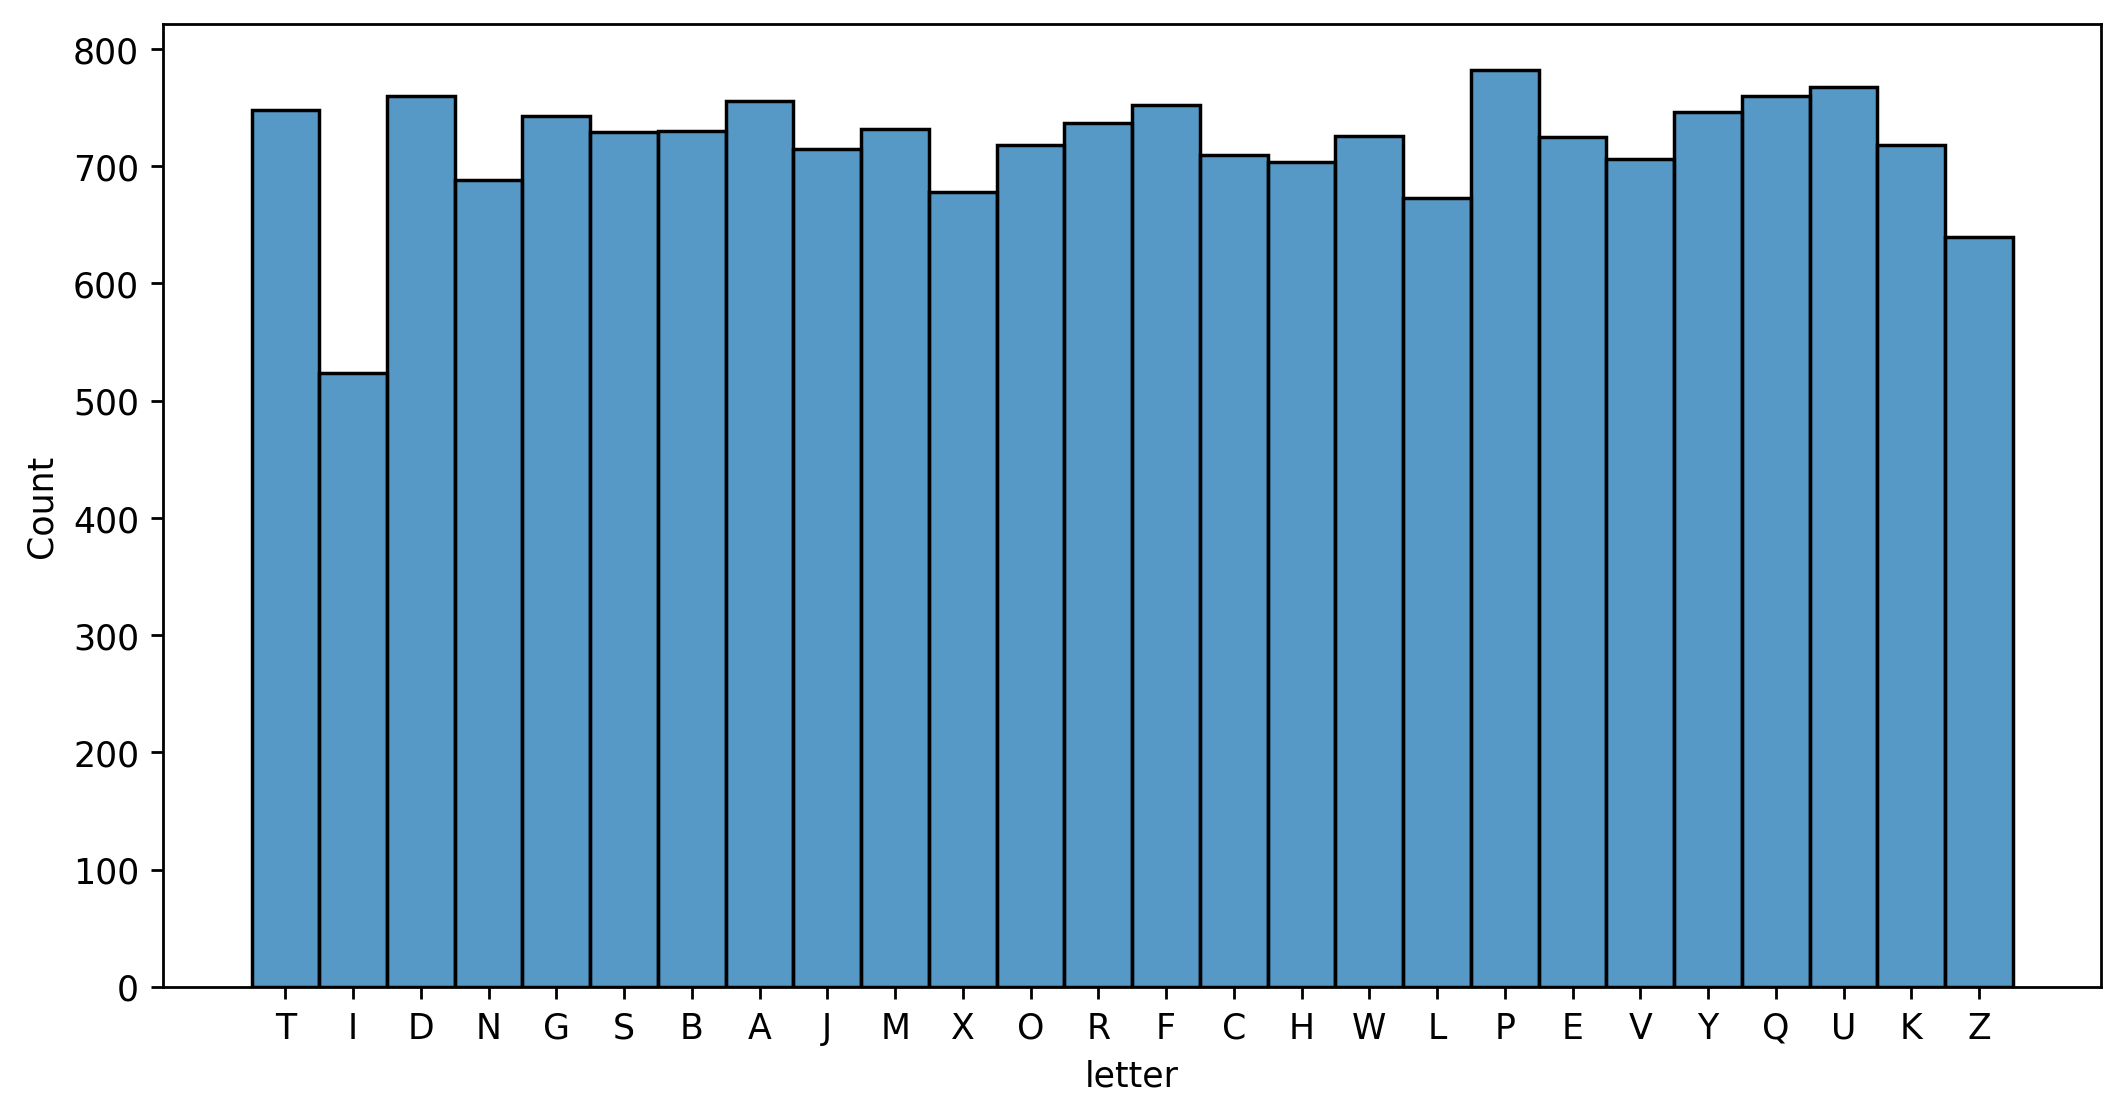

In [14]:
# plotting histogram to see the distribution of the target column
sns.histplot(data=df, x='letter')

In [15]:
# frequency of all values is almost similar

# DATA TRANSFORMATION

In [16]:
# defining x and y variable
x = df.iloc[:,1:]
y = df.loc[:, 'letter']

In [17]:
x.head()

,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10


In [18]:
y.head()

,letter
0,T
1,I
2,D
3,N
4,G


In [19]:
# label encoding on taget column
lb = LabelEncoder()
df['letter'] = lb.fit_transform(y)
df.head()

,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,19,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,8,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,3,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,13,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,6,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10


In [20]:
# the latters present in the target column are present in encoded format
df['letter'].unique()

array([19,  8,  3, 13,  6, 18,  1,  0,  9, 12, 23, 14, 17,  5,  2,  7, 22,
       11, 15,  4, 21, 24, 16, 20, 10, 25])

# Standardization

In [21]:
# for scalling the features
sc = StandardScaler()
x_labeled = sc.fit_transform(x)
x_labeled  = pd.DataFrame(x_labeled, columns=x.columns)
x_labeled.head()

,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,-1.144417,0.237070,-1.178294,-0.232716,-1.231474,0.531756,2.358246,-1.746100,0.344235,-0.953149,1.351557,0.035798,-1.347535,-0.223412,-1.494712,0.130096
1,0.451855,1.491943,-1.178294,0.685459,-0.768617,1.515924,-1.090370,0.158195,-0.517819,1.882192,-1.315513,0.510429,-0.486890,-0.223412,0.079965,1.336868
2,-0.080235,1.178224,0.372167,1.144546,1.082808,1.515924,-0.659293,-0.984382,0.344235,0.667046,-1.315513,-0.438833,-0.056568,-0.858409,-0.313704,0.733482
3,1.516037,1.178224,0.372167,0.226371,-0.305761,-0.944497,0.633938,-0.222664,0.344235,-1.763246,-0.934503,0.985060,1.234399,1.046582,-0.707373,0.130096
4,-1.144417,-1.958957,-1.178294,-2.069066,-1.231474,0.531756,-0.659293,0.539054,0.344235,-0.953149,-0.553493,0.510429,-0.917213,-0.858409,0.473635,1.336868


In [22]:
# df_final = pd.concat([df['letter'], x_labeled], axis=1)
# df_final.head()

In [23]:
df['letter'].unique()

array([19,  8,  3, 13,  6, 18,  1,  0,  9, 12, 23, 14, 17,  5,  2,  7, 22,
       11, 15,  4, 21, 24, 16, 20, 10, 25])

# MODEL BUILDING PART

In [40]:
# X = df_final.drop(columns='letter')
# Y = df_final['letter']

In [59]:
# splitting the data in training and testing part
xtrain, xtest, ytrain, ytest = train_test_split(x_labeled, df['letter'], train_size=0.80, random_state=42)

In [60]:
xtrain.head()

,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
1650,-0.080235,-0.390366,-0.144653,-0.691804,-0.305761,-0.452413,-0.228216,0.539054,0.344235,0.261997,0.589537,0.510429,-0.486890,-0.223412,0.079965,0.733482
4660,2.580219,1.805661,2.439449,0.685459,0.619952,0.039671,-0.228216,-0.984382,1.637317,1.072095,-0.553493,0.035798,0.373754,-0.858409,0.079965,-0.473290
10117,-0.080235,0.864506,-0.144653,0.685459,-0.768617,0.039671,-0.228216,1.681631,0.775262,-0.548100,0.208527,0.035798,-0.056568,-0.223412,0.079965,0.130096
4794,-1.676508,-1.958957,-1.695114,-1.609979,-1.231474,-1.436582,-0.228216,0.158195,1.206289,-0.548100,-0.172483,2.408953,-1.347535,-0.223412,1.260973,0.733482
5642,-0.080235,0.864506,-0.144653,1.603634,-0.305761,0.531756,-0.228216,1.300772,0.344235,-0.953149,0.208527,0.035798,-0.056568,-0.223412,0.867304,0.733482


In [61]:
xtrain.shape

(14934, 16)

In [62]:
ytrain.shape

(14934,)

In [63]:
xtest.shape

(3734, 16)

In [64]:
ytest.shape

(3734,)

In [65]:
# unique values in the target column
y.nunique()

26

In [66]:
# MODEL BUILDING

# intializing
ann = Sequential()

# first hidden layer
ann.add(Dense(units=64, activation='relu', input_dim=xtrain.shape[1]))
# second hidden layer
ann.add(Dense(units=64, activation='relu'))
# output layer
ann.add(Dense(units=26, activation='softmax'))

# compiling the model
ann.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# TRAINING THE MODEL
ann.fit(xtrain, ytrain, epochs=30, validation_data=(xtest, ytest))

Epoch 1/30
467/467 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.3830 - loss: 2.3169 - val_accuracy: 0.7134 - val_loss: 0.9819
Epoch 2/30
467/467 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7452 - loss: 0.8757 - val_accuracy: 0.7933 - val_loss: 0.7232
Epoch 3/30
467/467 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8128 - loss: 0.6437 - val_accuracy: 0.8307 - val_loss: 0.5939
Epoch 4/30
467/467 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8488 - loss: 0.5240 - val_accuracy: 0.8479 - val_loss: 0.5117
Epoch 5/30
467/467 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8742 - loss: 0.4309 - val_accuracy: 0.8709 - val_loss: 0.4461
Epoch 6/30
467/467 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8868 - loss: 0.3890 - val_accuracy: 0.8779 - val_loss: 0.4056
Epoch 7/30
467/467 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8988 - loss: 0.3425 - val_accuracy: 0.8881 - val_loss: 0.3783
Epoch 8/30
467/467 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9111 - loss: 0.3059 - val_accuracy: 0.

# MODEL EVALUATION

In [67]:
train_loss, train_accuracy = ann.evaluate(xtrain, ytrain)
print(f'train loss is : {train_loss}')
print(f'train loss is : {train_accuracy}')

467/467 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9728 - loss: 0.0862
train loss is : 0.08835890144109726
train loss is : 0.9724119305610657


In [68]:
test_loss, test_accuracy = ann.evaluate(xtest, ytest)
print(f'test loss is : {test_loss}')
print(f'test loss is : {test_accuracy}')

117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9384 - loss: 0.1980
test loss is : 0.20579087734222412
test loss is : 0.9346545338630676


In [69]:
# there is a little bit overfitting in the model
# I need to do hyperparameter tunning

# HYPERPARAMETER TUNNING

In [70]:
# defining a function
def hyper(hp):
  model = Sequential()
# for loop using for dinding out the correct number of hidden layers and the number of nurons along with best activation function for hidden layers
  for i in range(hp.Int('num_layer{i}', 1, 10)):
    units = hp.Int(f'unit_{i}', 8, 128, 8)
    activation = hp.Choice(f'activation_{i}', ['relu', 'softmax', 'tanh',])
# hidden layer
    if i == 0:
      model.add(Dense(units=units, activation=activation, input_dim=x.shape[1]))
    else:
      model.add(Dense(units=units, activation=activation))
# output layer
  model.add(Dense(units=units, activation='sigmoid'))
# copiling the model
  model.compile(optimizer=hp.Choice('optimizer', ['adam', 'rmsprop', 'sgd']), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
  # returning model
  return model

In [71]:
# installing keras tunner liberary
!pip install -q -U keras-tuner

In [72]:
import keras_tuner as kt
# initialize the tuner
tuner = kt.RandomSearch(
    hyper,
    objective = 'val_accuracy',
    max_trials=3,
    project_name = 'alphabet_tune')

Reloading Tuner from ./alphabet_tune/tuner0.json


In [73]:
# performing hyper parameter tunning
tuner.search(xtrain, ytrain, epochs=90, validation_data = (xtest, ytest) )

Trial 5 Complete [00h 02m 55s]
val_accuracy: 0.6992501616477966

Best val_accuracy So Far: 0.9512587189674377
Total elapsed time: 00h 15m 28s


In [74]:
# asking for the best hyperparameters
tuner.get_best_hyperparameters()[0].values

{'num_layer{i}': 2,
 'unit_0': 48,
 'activation_0': 'relu',
 'optimizer': 'adam',
 'unit_1': 64,
 'activation_1': 'relu',
 'unit_2': 56,
 'activation_2': 'softmax',
 'unit_3': 64,
 'activation_3': 'relu',
 'unit_4': 72,
 'activation_4': 'relu',
 'unit_5': 96,
 'activation_5': 'relu',
 'unit_6': 96,
 'activation_6': 'relu',
 'unit_7': 24,
 'activation_7': 'relu',
 'unit_8': 80,
 'activation_8': 'softmax'}

In [75]:
# it is saying that I need to add 6 layer and it is giving the best parameters for each hidden layer

In [76]:
# getting the best moddel which is having the best above shown parameters
# let's build the model by using these best parameters
tuned_model = tuner.get_best_models(num_models=1)[0]

In [77]:
# training this model
tuned_model.fit(xtrain, ytrain, epochs=120, validation_data=(xtest, ytest))

Epoch 1/120
467/467 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9808 - loss: 0.0693 - val_accuracy: 0.9834 - val_loss: 0.0564
Epoch 2/120
467/467 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9827 - loss: 0.0569 - val_accuracy: 0.9756 - val_loss: 0.0725
Epoch 3/120
467/467 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9834 - loss: 0.0553 - val_accuracy: 0.9791 - val_loss: 0.0592
Epoch 4/120
467/467 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9875 - loss: 0.0422 - val_accuracy: 0.9778 - val_loss: 0.0667
Epoch 5/120
467/467 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9880 - loss: 0.0425 - val_accuracy: 0.9738 - val_loss: 0.0822
Epoch 6/120
467/467 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.9875 - loss: 0.0439 - val_accuracy: 0.9799 - val_loss: 0.0653
Epoch 7/120
467/467 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9879 - loss: 0.0407 - val_accuracy: 0.9721 - val_loss: 0.0802
Epoch 8/120
467/467 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9882 - loss: 0.0402 - val_accu

# EVALUATION OF MODEL

In [78]:
train_loss, train_accuracy =  tuned_model.evaluate(xtrain, ytrain)
test_loss, test_accuracy =  tuned_model.evaluate(xtest, ytest)
print(f'training loss is: {train_loss}, train accuracy : {train_accuracy*100}%')
print(f'test loss is: {test_loss}, test accuracy : {test_accuracy*100}%')

467/467 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9962 - loss: 0.0101
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9615 - loss: 0.1602
training loss is: 0.011346813291311264, train accuracy : 99.63840842247009%
test loss is: 0.14722508192062378, test accuracy : 96.57204151153564%


In [ ]:
#after performing hyperparameter tunning models performance is better